In [1]:
# Optional: Install libraries (uncomment if needed, but they are pre-installed in Colab)
# !pip install scikit-learn pandas

# Import the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Create a dummy dataset as a dictionary
data = {
    'text': [
        "Hey John, are you available for a quick meeting at 2 PM?",
        "Get your free gift card now! Click the link!",
        "Urgent: Your account has been compromised. Log in to fix it.",
        "Hi, can we reschedule our call?",
        "Congratulations! You've won a brand new car!",
        "Project report is due by Friday. Thanks!",
        "Viagra deals! Lowest prices guaranteed!",
        "Did you see the latest movie? Let's catch up.",
        "You're a winner! Claim your prize now!",
        "Reminder: Please submit your timesheet.",
    ],
    'label': [
        'ham', 'spam', 'spam', 'ham', 'spam', 'ham', 'spam', 'ham', 'spam', 'ham'
    ]
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Display the first few rows of the DataFrame
print("Initial Dataset:")
print(df.head())

Initial Dataset:
                                                text label
0  Hey John, are you available for a quick meetin...   ham
1       Get your free gift card now! Click the link!  spam
2  Urgent: Your account has been compromised. Log...  spam
3                    Hi, can we reschedule our call?   ham
4       Congratulations! You've won a brand new car!  spam


In [3]:
# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer to the email text and transform the text into a document-term matrix
X = vectorizer.fit_transform(df['text'])
y = df['label'] # Our labels (ham/spam)

# Print the shape of the resulting feature matrix
print("Shape of the vectorized data (features):", X.shape)
print("Vocabulary size:", len(vectorizer.vocabulary_))


Shape of the vectorized data (features): (10, 68)
Vocabulary size: 68


In [4]:
# Split the data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Print the size of the new datasets
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 8
Testing set size: 2


In [5]:
# Initialize the Multinomial Naive Bayes classifier
model = MultinomialNB()

# Train the model using the training data
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


Model Evaluation:
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

        spam       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



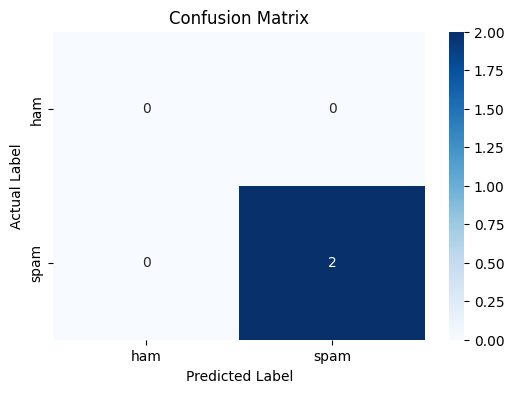

In [6]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print evaluation metrics
print("Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Generate and plot the confusion matrix for better visualization
cm = confusion_matrix(y_test, y_pred, labels=['ham', 'spam'])
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


In [7]:
# New emails to predict
new_emails = [
    "You have won a free lottery ticket! Click now!", # Should be spam
    "Can you please send me the report by the end of the day?" # Should be ham
]

# Vectorize the new emails using the same vectorizer we used before
new_emails_vectorized = vectorizer.transform(new_emails)

# Make the predictions
predictions = model.predict(new_emails_vectorized)

# Display the predictions
print("New email predictions:")
for i, email in enumerate(new_emails):
    print(f"Email: '{email}' -> Predicted as: {predictions[i]}")


New email predictions:
Email: 'You have won a free lottery ticket! Click now!' -> Predicted as: spam
Email: 'Can you please send me the report by the end of the day?' -> Predicted as: ham
